# Machine Learning Essentials SS25 - Exercise Sheet 6

# HEY :)

Das mit dem Konvertieren der Mathesymbole wollte leider nicht klappen. <br>
Hier gibt es die Formeln in leserlich: https://github.com/Kamikali/mle_sheets/blob/main/MLE25_sheet06.ipynb <br>
Ich hoffe das ist kein Problem.<br>

## Exercise 1: Convolutions of Continuous and Discrete Variables


#### 1. Write down the convolution integral

The PDFs are

$
f_X(x)=\frac{1}{\sqrt{2\pi\,\sigma_1^2}}
\exp\!\Bigl(-\frac{(x-\mu_1)^2}{2\sigma_1^2}\Bigr),\quad
f_Y(y)=\frac{1}{\sqrt{2\pi\,\sigma_2^2}}
\exp\!\Bigl(-\frac{(y-\mu_2)^2}{2\sigma_2^2}\Bigr).
$

Their sum’s PDF is

$
f_Z(z)
=\int_{-\infty}^{\infty} f_X(x)\,f_Y(z-x)\,dx
=\frac{1}{2\pi\,\sigma_1\,\sigma_2}
\int e^{-\,A(x)}\,dx,
$

where (we just substitute the term for A to save space)

$
A(x)
=\frac{(x-\mu_1)^2}{2\sigma_1^2}
+\frac{\bigl(z-x-\mu_2\bigr)^2}{2\sigma_2^2}.
$


#### 2. Combine exponents and complete the square

Expand the quadratic form in $x$:

$
A(x)
=\frac{\sigma_2^2\,(x-\mu_1)^2 + \sigma_1^2\,(z-x-\mu_2)^2}
{2\,\sigma_1^2\,\sigma_2^2}.
$

Collect terms in $x^2$, $x$, and constants:

$
A(x)
=\frac{(\sigma_1^2+\sigma_2^2)\,x^2
-2\bigl(\sigma_2^2\mu_1+\sigma_1^2(z-\mu_2)\bigr)x
+\bigl(\sigma_2^2\mu_1^2+\sigma_1^2(z-\mu_2)^2\bigr)}
{2\,\sigma_1^2\,\sigma_2^2}.
$

Write

$
A(x)
= \underbrace{\frac{\sigma_1^2+\sigma_2^2}{2\,\sigma_1^2\,\sigma_2^2}}_{=:a}\,
\Bigl[x - \underbrace{\frac{\sigma_2^2\mu_1+\sigma_1^2(z-\mu_2)}{\sigma_1^2+\sigma_2^2}}_{=:b}\Bigr]^2
\;+\;\text{(terms independent of \(x\))}.
$

Thus

$
\int e^{-A(x)}\,dx
= \int \exp\!\bigl(-a\,(x-b)^2\bigr)\,dx
\;\times\;
\exp\!\bigl(-\,\text{const}\bigr).
$

Using the standard Gaussian integral
$\displaystyle
\int_{-\infty}^\infty e^{-a (x-b)^2}\,dx =\sqrt{\frac{\pi}{a}},
$
we get

$
\int e^{-A(x)}\,dx
=\sqrt{\frac{2\pi\,\sigma_1^2\,\sigma_2^2}{\sigma_1^2+\sigma_2^2}}
\;\times\;\exp\!\Bigl(-\,\frac{(z-(\mu_1+\mu_2))^2}{2(\sigma_1^2+\sigma_2^2)}\Bigr).
$


#### 3. Assemble the result

Putting back the normalization,

$
f_Z(z)
=\frac{1}{2\pi\,\sigma_1\,\sigma_2}
\;\sqrt{\frac{2\pi\,\sigma_1^2\,\sigma_2^2}{\sigma_1^2+\sigma_2^2}}
\;\exp\!\Bigl(-\,\frac{(z-(\mu_1+\mu_2))^2}{2(\sigma_1^2+\sigma_2^2)}\Bigr).
$

A little algebra shows the prefactor simplifies to
$\displaystyle1/\sqrt{2\pi\,(\sigma_1^2+\sigma_2^2)}$.  Hence

$
\boxed{
f_Z(z)
=\frac{1}{\sqrt{2\pi\,(\sigma_1^2+\sigma_2^2)}}
\;\exp\!\Bigl(-\frac{\bigl(z-(\mu_1+\mu_2)\bigr)^2}
{2\,(\sigma_1^2+\sigma_2^2)}\Bigr).
}
$

This is exactly the PDF of
$\displaystyle\mathcal N(\mu_1+\mu_2,\;\sigma_1^2+\sigma_2^2)$.


**Conclusion.** The sum of two independent Gaussians is Gaussian, with

$
\mu_Z=\mu_1+\mu_2,
\qquad
\sigma_Z^2=\sigma_1^2+\sigma_2^2.
$

<br><br><br>


## 2. Convolutional Layer Window

using stride $s$ in both directions, the output spatial dimensions $(H_{\text{out}},W_{\text{out}})$ are given by

$
\boxed{
H_{\text{out}}
=\Big\lfloor\frac{H + 2p - K_H}{s}\Big\rfloor \;+\;1,
\qquad
W_{\text{out}}
=\Big\lfloor\frac{W + 2p - K_W}{s}\Big\rfloor \;+\;1.
}
$



## Exercise 2 - CNN Classifier

The SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5. We first load the data and have the shapes printed out. The split into train, validation and test set has already been carried out.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as tc
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

np.random.seed(42)
tc.manual_seed(42)

device = tc.device("cuda" if tc.cuda.is_available() else "cpu")

In [2]:
# Load the dataset
X_train = np.load('sign_data/X_train.npy')
Y_train = np.load('sign_data/Y_train.npy')
X_val = np.load('sign_data/X_val.npy')
Y_val = np.load('sign_data/Y_val.npy')
X_test = np.load('sign_data/X_test.npy')
Y_test = np.load('sign_data/Y_test.npy')

# print the shape of the dataset
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("Y_val shape: " + str(Y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape)+"\n")
print("classes: " + str(np.unique(Y_train)))

# check if classes are balanced
print("Counts of classes in Y_train: " + str(np.unique(Y_train, return_counts=True)[1]))
print("Counts of classes in Y_val: " + str(np.unique(Y_val, return_counts=True)[1]))
print("Counts of classes in Y_test: " + str(np.unique(Y_test, return_counts=True)[1]))

X_train shape: (960, 64, 64, 3)
Y_train shape: (960,)
X_val shape: (120, 64, 64, 3)
Y_val shape: (120,)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120,)

classes: [0 1 2 3 4 5]
Counts of classes in Y_train: [160 160 160 160 160 160]
Counts of classes in Y_val: [20 20 20 20 20 20]
Counts of classes in Y_test: [20 20 20 20 20 20]


The classes are balanced so that accuracy is an appropriate measure for evaluating a classifier. We next visualize an instance of each class.

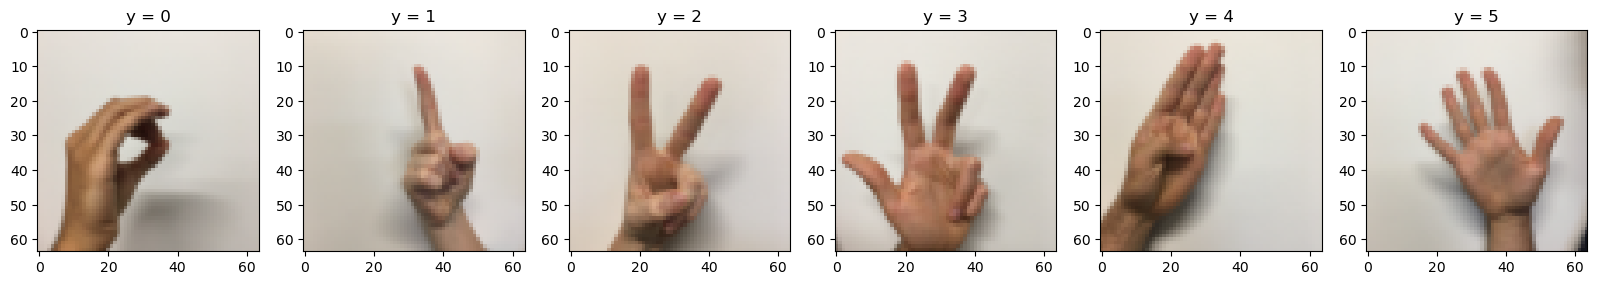

In [3]:
fig, axs = plt.subplots(1, 6, figsize=(20, 10))
for i in range(6):
    # get indices where the label is i
    idx = np.where(Y_train == i)[0][0]
    axs[i].imshow(X_train[idx])
    axs[i].set_title("y = " + str(i))

Pixels in each channel (RGB) of the images take values in the range \[0, 255\]. However, it is desirable to have absolute values in the range \[0, 1\] as input for neural network architectures to avoid exploding or vanishing gradient problems. Through the following cell, we apply a simple data scaling procedure: we divide the values of the pixels by 255.
As an alternative, you can use the `StandardScaler()` function of the scikit-learn library.

In [4]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

### Task 1

Use pytorch to build the model. Take a look at the [documentation](https://pytorch.org/tutorials/beginner/basics/intro.html) for an introduction, a detailed tutorial, for example for classifiers, can be found [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

Implement the following architecture:

     - Conv2d: 4 output channels, 3 by 3 filter size, stride 1, padding "same"
     - BatchNorm2d: 4 output channels
     - ReLU activation
     - MaxPool2d: 2 by 2 filter size, stride 2, padding 0
     - Conv2d: 8 output channels, 3 by 3 filter size, stride 1, padding "same"
     - BatchNorm2d: 8 output channels
     - ReLU activation
     - MaxPool2d: Use a 2 by 2 filter size, stride 2, padding 0
     - Flatten the previous output
     - Linear: 64 output neurons
     - ReLu activation function
     - Linear: 6 output neurons
     - LogSoftmax

We use the [LogSoftmax](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html) here instead of the Softmax for computational reasons. Accordingly, the loss function is not CrossEntropyLoss but NLLLoss. When flattening, be careful not to do it with the batch dimension but only with the height, width and channel dimension.

In [5]:
class CNN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=1),  
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),  
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            
            nn.Flatten(),
            nn.Linear(in_features=8 * 16 * 16, out_features=64),  # input image size is 64x64
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=6),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, X):
        return self.network(X)

To test your model you can foward some random numbers. The shape of the output should be (2, 6).

In [6]:
cnn_model = CNN_Classifier()
# dummy sample of batch size 2
X_random = tc.randn(2, 3, 64, 64)
output = cnn_model(X_random)

print("Output shape: " + str(output.shape))

Output shape: torch.Size([2, 6])


torchsummary.summary provides a nice overview of the model and the number of learnable parameters:

In [8]:
from torchsummary import summary
summary(cnn_model, input_size=(3, 64, 64), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 64, 64]             112
       BatchNorm2d-2            [-1, 4, 64, 64]               8
              ReLU-3            [-1, 4, 64, 64]               0
         MaxPool2d-4            [-1, 4, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             296
       BatchNorm2d-6            [-1, 8, 32, 32]              16
              ReLU-7            [-1, 8, 32, 32]               0
         MaxPool2d-8            [-1, 8, 16, 16]               0
           Flatten-9                 [-1, 2048]               0
           Linear-10                   [-1, 64]         131,136
             ReLU-11                   [-1, 64]               0
           Linear-12                    [-1, 6]             390
       LogSoftmax-13                    [-1, 6]               0
Total params: 131,958
Trainable params:

### Task 2

DataLoaders wrap around Datasets to provide efficient data batching, shuffling, and parallel loading during model training or inference. To define a custom dataset we must implement three functions: __init__, __len__ and __get_item__. While __len__ defines the length of the dataset and thus the number of batches in the dataloader, __get_item__ can be used to get a single sample through the index.

In [9]:
class Image_Dataset(Dataset):
    def __init__(self, X, Y):
        # X: numpy array, shape (N, H, W, C) or (N, C, H, W)
        # Y: numpy array, shape (N,)
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # get raw numpy
        x = self.X[idx]
        y = self.Y[idx]

        # to tensor
        x = tc.tensor(x, dtype=tc.float32)
        # if your X is (H, W, C), convert to (C, H, W)
        if x.ndim == 3 and x.shape[-1] in (1,3):
            x = x.permute(2, 0, 1)

        y = tc.tensor(y, dtype=tc.long)
        return x, y

In [10]:
# Create Dataset instances
train_batch_size = 64
val_batch_size   = len(Y_val)
test_batch_size  = len(Y_test)

train_dataset = Image_Dataset(X_train, Y_train)
val_dataset   = Image_Dataset(X_val,   Y_val)
test_dataset  = Image_Dataset(X_test,  Y_test)

# Create DataLoader instances
train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=4,        
    pin_memory=True       
)

val_loader = DataLoader(
    val_dataset,
    batch_size=val_batch_size,
    shuffle=False,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False,
    num_workers=2
)

To make sure that everything has worked properly, we take a sample of the data_loader and visualize it.

/tmp/ipykernel_200023/2461653407.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647429097/work/aten/src/ATen/native/TensorShape.cpp:3683.)
  plt.imshow(sample_X[0].T)


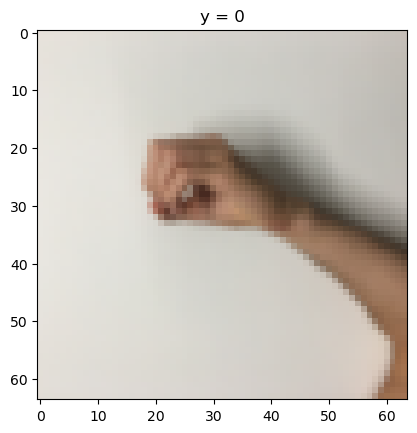

In [11]:
sample_X, sample_Y = next(iter(train_loader))
plt.imshow(sample_X[0].T)
plt.title("y = " + str(int(sample_Y[0].item())))
plt.show()

### Task 3

Implement the training loop. Use the negative log-likelihood loss (NLLLoss) and the Adam optimizer. Be sure to zero the gradients after each optimization step to avoid accumulating contributions from previous epochs and batches.

In [12]:
def train_cnn(model, train_loader, val_loader, lr, n_epochs, device):
    model = model.to(device)

    # Initialize the loss and optimizer
    loss_function = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss = np.zeros(n_epochs)
    val_loss   = np.zeros(n_epochs)
    train_acc  = np.zeros(n_epochs)
    val_acc    = np.zeros(n_epochs)

    for epoch in range(1, n_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for X_batch, Y_batch in train_loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

            # Forward pass
            output = model(X_batch)                   # (batch_size, 6)
            loss   = loss_function(output, Y_batch)

            # Backward + optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate batch loss
            epoch_loss += loss.item() / len(train_loader)

        # Record training metrics (using last batch for acc)
        train_loss[epoch - 1] = epoch_loss
        train_acc[epoch - 1] = (output.argmax(dim=1) == Y_batch).float().mean().item()

        # Validation step
        model.eval()
        with tc.no_grad():
            X_val_batch, Y_val_batch = next(iter(val_loader))
            X_val_batch, Y_val_batch = X_val_batch.to(device), Y_val_batch.to(device)

            val_output = model(X_val_batch)
            val_loss_val = loss_function(val_output, Y_val_batch)

            val_loss[epoch - 1] = val_loss_val.item()
            val_acc[epoch - 1] = (val_output.argmax(dim=1) == Y_val_batch).float().mean().item()

        print(f"Epoch {epoch}/{n_epochs}  "
              f"- Train Loss: {train_loss[epoch-1]:.4f}, "
              f"Train Acc: {train_acc[epoch-1]:.4f}  "
              f"- Val Loss: {val_loss[epoch-1]:.4f}, "
              f"Val Acc: {val_acc[epoch-1]:.4f}")

    return train_loss, val_loss, train_acc, val_acc

In [13]:
n_epochs = 50
learning_rates = [1e-4, 1e-3, 1e-2]
results = {}

best_model = None
best_val_acc = 0.0
best_lr = None

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    model = CNN_Classifier().to(device)
    train_loss, val_loss, train_acc, val_acc = train_cnn(
        model, train_loader, val_loader, lr, n_epochs, device
    )
    results[lr] = (train_loss, val_loss, train_acc, val_acc)

    # Compare final val accuracy to keep best model
    if val_acc[-1] > best_val_acc:
        best_val_acc = val_acc[-1]
        best_model = model
        best_lr = lr

print(f"\nBest model used lr={best_lr} with final validation accuracy = {best_val_acc:.4f}")



Training model with learning rate: 0.0001
Epoch 1/50  - Train Loss: 1.7313, Train Acc: 0.2969  - Val Loss: 1.7896, Val Acc: 0.1667
Epoch 2/50  - Train Loss: 1.5620, Train Acc: 0.5312  - Val Loss: 1.7211, Val Acc: 0.3167
Epoch 3/50  - Train Loss: 1.4038, Train Acc: 0.6250  - Val Loss: 1.5072, Val Acc: 0.5583
Epoch 4/50  - Train Loss: 1.2614, Train Acc: 0.7500  - Val Loss: 1.2955, Val Acc: 0.6333
Epoch 5/50  - Train Loss: 1.1362, Train Acc: 0.8125  - Val Loss: 1.1689, Val Acc: 0.6750
Epoch 6/50  - Train Loss: 1.0359, Train Acc: 0.6875  - Val Loss: 1.1029, Val Acc: 0.6500
Epoch 7/50  - Train Loss: 0.9358, Train Acc: 0.8281  - Val Loss: 1.0176, Val Acc: 0.6917
Epoch 8/50  - Train Loss: 0.8559, Train Acc: 0.8125  - Val Loss: 0.9558, Val Acc: 0.7333
Epoch 9/50  - Train Loss: 0.7829, Train Acc: 0.8125  - Val Loss: 0.9066, Val Acc: 0.7167
Epoch 10/50  - Train Loss: 0.7225, Train Acc: 0.8594  - Val Loss: 0.8680, Val Acc: 0.7583
Epoch 11/50  - Train Loss: 0.6716, Train Acc: 0.8438  - Val Loss: 

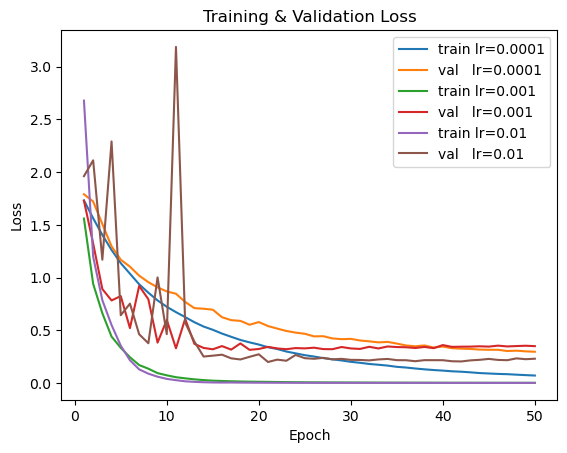

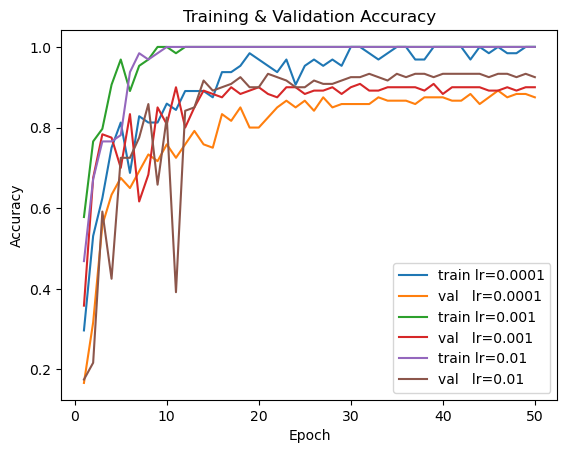

In [14]:
# Plot Loss
plt.figure()
for lr in learning_rates:
    tl, vl, _, _ = results[lr]
    plt.plot(range(1, n_epochs+1), tl, label=f"train lr={lr}")
    plt.plot(range(1, n_epochs+1), vl, label=f"val   lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure()
for lr in learning_rates:
    _, _, ta, va = results[lr]
    plt.plot(range(1, n_epochs+1), ta, label=f"train lr={lr}")
    plt.plot(range(1, n_epochs+1), va, label=f"val   lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()

#### Wow! Da ging wahrscheinlich sogar noch etwas mehr!

### Task 4

In [15]:
# Ensure model is in evaluation mode
best_model.eval()

# Disable gradient computation for evaluation
with tc.no_grad():
    # Load the full test set in one batch
    X_test_batch, Y_test_batch = next(iter(test_loader))
    X_test_batch, Y_test_batch = X_test_batch.to(device), Y_test_batch.to(device)

    # Forward pass
    test_output = best_model(X_test_batch)

    # Compute test loss
    test_loss = nn.NLLLoss()(test_output, Y_test_batch)

    # Compute test accuracy
    test_predictions = test_output.argmax(dim=1)
    test_acc = (test_predictions == Y_test_batch).float().mean().item()

print(f"\nTest Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.3214
Test Accuracy: 0.9583


## Exercise 3 -  CNN Autoencoder

In the next task we want to build an autoencoder. It consists of an encoder, which transforms the data into a low-dimensional code, and a decoder, which reconstructs the original data. 

We use the Fashion MNIST dataset, which consists of 28x28 grayscale images. There are 10 classes, each representing different items of clothing. The data can be conveniently downloaded, separated and transformed with torchvision. As we will not be tuning any hyperparameters, we do not need a validation set.

In [16]:
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor (range [0, 1])
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load FashionMNIST train and test sets
train_data = datasets.FashionMNIST(
    root='./fashion_mnist',          # Download path
    train=True,            # Load training set
    download=True,         # Download if not already present
    transform=transform    # Apply transformations
)

test_data = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,           # Load test set
    download=True,
    transform=transform
)

classes = train_data.targets.unique()

# we only need a subset that consists of 1000 samples of each class for the train set
# and 10 samples of each class for the test set
indices_train = []
indices_test = []
for i in range(len(classes)):
    indices_train += list(np.where(train_data.targets == classes[i])[0][:1000])
    indices_test += list(np.where(test_data.targets == classes[i])[0][:10])
    
train_data.data = train_data.data[indices_train]
train_data.targets = train_data.targets[indices_train]
test_data.data = test_data.data[indices_test]
test_data.targets = test_data.targets[indices_test]

# Create DataLoaders 
train_batch_size = 256
test_batch_size = len(test_data) 
train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

# Print the shape of the dataset
print("train images shape: " + str(train_data.data.shape))
print("train labels shape: " + str(train_data.targets.shape))
print("test images shape: " + str(test_data.data.shape))
print("test labels shape: " + str(test_data.targets.shape))
print("classes: " + str(classes))

# check if classes are balanced
print("Counts of classes in train set: " + str(train_data.targets.unique(return_counts=True)[1]))
print("Counts of classes in test set: " + str(test_data.targets.unique(return_counts=True)[1]))

train images shape: torch.Size([10000, 28, 28])
train labels shape: torch.Size([10000])
test images shape: torch.Size([100, 28, 28])
test labels shape: torch.Size([100])
classes: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Counts of classes in train set: tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])
Counts of classes in test set: tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])


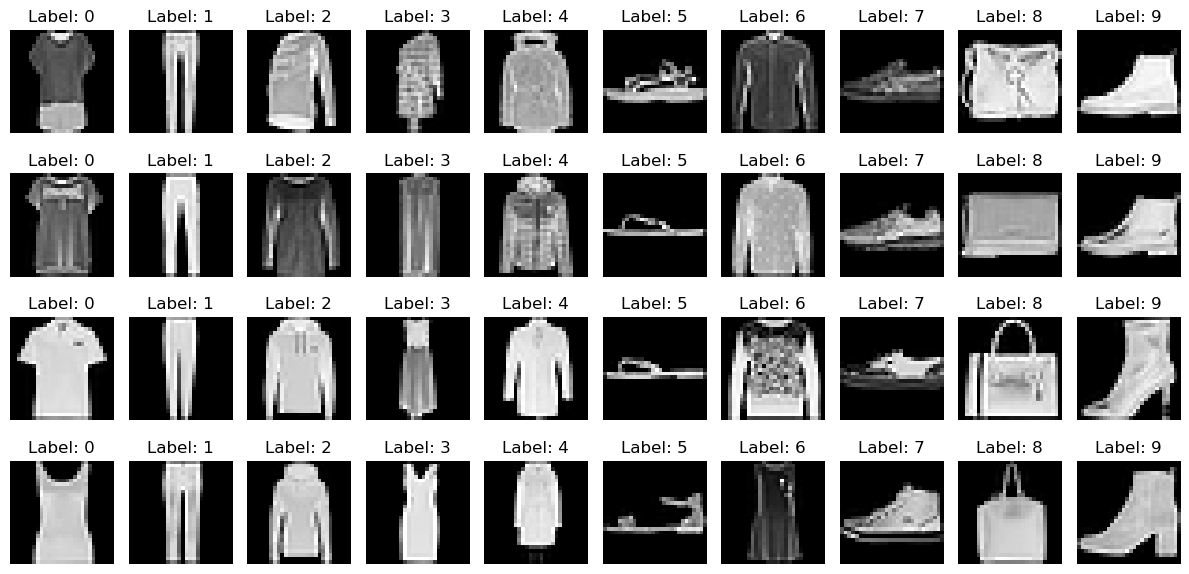

In [17]:
# Get a batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualize a batch of images
fig, axes = plt.subplots(4, 10, figsize=(12, 6))
for i in range(4):
    for j in range(10):
        # find the ith image of class j
        idx = np.where(labels == j)[0][i]
        axes[i, j].imshow(images[idx].squeeze(), cmap='gray')
        axes[i, j].set_title(f"Label: {j}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()


### Task 1

We compare two architectures: a linear autoencoder and a CNN autoencoder. The latter typically consists of convolutional layers for the encoder and transposed convolutional layers for the decoder. In addition, fully connected layers can bring the feature to the desired code dimension (also called latent dimension). Implement the following architecture:

Encoder:
- Conv2d: 16 output channels, 3 by 3 filter size, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Conv2d: 32 output channels, 3 by 3, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Conv2d: 64 output channel, 3 by 3 filter size, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Flatten the previous output
- Linear: <_latent dimension_> output neurons

Decoder:
- Linear: 64x3x3 = 576 output neurons
- Unflatten the previous output to shape (64, 3, 3)
- ConvTranspose2d: 32 output channels, 3 by 3 filter size, stride 2, padding 0, output padding 0
- ReLU activation
- ConvTranspose2d: 16 output channels, 3 by 3 filter size, stride 2, padding 1, output padding 1
- ReLU activation
- ConvTranspose2d: 1 output channel, 3 by 3 filter size, stride 2, padding 1, output padding 1

You might need to infer the input dimension of the linear layer in the encoder.

In [18]:
class Conv_AE(nn.Module):
    def __init__(self, latent_dim):
        super(Conv_AE, self).__init__()

        # Encoder
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),  # "same" padding
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),  # size reduces by 1

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        )

        # Calculate flattened size after convolutions
        sample_input = tc.zeros(1, 1, 28, 28)  # batch size = 1
        with tc.no_grad():
            conv_out = self.encoder_conv(sample_input)
        self.flattened_size = conv_out.view(1, -1).shape[1]

        self.encoder_fc = nn.Linear(self.flattened_size, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, 64 * 3 * 3)

        self.decoder_deconv = nn.Sequential(
            nn.Unflatten(1, (64, 3, 3)),

            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=0, output_padding=0),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)
            # No activation here (assumes reconstruction loss handles range)
        )

    def forward(self, x):
        encoded = self.encoder_conv(x)
        encoded = encoded.view(x.size(0), -1)
        code = self.encoder_fc(encoded)

        decoded = self.decoder_fc(code)
        decoded = self.decoder_deconv(decoded)

        return decoded

We check again whether the model is working properly.

In [19]:
conv_ae_model = Conv_AE(2)
X_random = tc.randn(2, 1, 28, 28)
reconstructed, latent = conv_ae_model(X_random)

print("Reconstructed shape: " + str(reconstructed.shape), "\n", "Latent shape: " + str(latent.shape))

summary(conv_ae_model, input_size=(1, 28, 28), device="cpu")

Reconstructed shape: torch.Size([1, 28, 28]) 
 Latent shape: torch.Size([1, 28, 28])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 27, 27]               0
            Conv2d-4           [-1, 32, 27, 27]           4,640
              ReLU-5           [-1, 32, 27, 27]               0
         MaxPool2d-6           [-1, 32, 26, 26]               0
            Conv2d-7           [-1, 64, 26, 26]          18,496
              ReLU-8           [-1, 64, 26, 26]               0
         MaxPool2d-9           [-1, 64, 25, 25]               0
           Linear-10                    [-1, 2]          80,002
           Linear-11                  [-1, 576]           1,728
        Unflatten-12             [-1, 64, 3, 3]               0
  ConvTranspose2d-

### Task 2

The training of an autoencoder compares the original input to the reconstruction, usually by means of the mean squared error.

In [20]:
def train_ae(model, train_loader, test_loader, lr, n_epochs, device):
    model = model.to(device)

    # Initialize the loss function and optimizer
    loss_function = tc.nn.MSELoss()
    optimizer = tc.optim.Adam(model.parameters(), lr=lr)

    train_loss = np.zeros(n_epochs)
    test_loss = np.zeros(n_epochs)

    for epoch in range(1, n_epochs + 1):
        model.train()
        epoch_loss = 0

        for X, _ in train_loader:
            X = X.to(device)

            # Forward pass
            output = model(X)
            loss = loss_function(output, X)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() / len(train_loader)

        train_loss[epoch - 1] = epoch_loss

        # Evaluation step
        model.eval()
        with tc.no_grad():
            X, _ = next(iter(test_loader))
            X = X.to(device)
            output = model(X)
            loss = loss_function(output, X)
            test_loss[epoch - 1] = loss.item()

        print(f"Epoch {epoch}/{n_epochs} - Train Loss: {epoch_loss:.4f}, Test Loss: {loss.item():.4f}")

    return train_loss, test_loss


In [10]:
latent_dims = [8, 16, 32, 64]
results = {}

for latent_dim in latent_dims:
    print(f"\nTraining Conv_AE with latent_dim = {latent_dim}")
    model = Conv_AE(latent_dim=latent_dim)
    
    train_loss, test_loss = train_ae(
        model=model,
        train_loader=train_loader,
        test_loader=test_loader,
        lr=1e-3,
        n_epochs=15,
        device='cuda' if tc.cuda.is_available() else 'cpu'
    )
    
    results[latent_dim] = {
        'train_loss': train_loss,
        'test_loss': test_loss,
        'model': model
    }


Training Conv_AE with latent_dim = 8
Epoch 1/15 - Train Loss: 0.3433, Test Loss: 0.2015
Epoch 2/15 - Train Loss: 0.1625, Test Loss: 0.1322
Epoch 3/15 - Train Loss: 0.1243, Test Loss: 0.1118
Epoch 4/15 - Train Loss: 0.1093, Test Loss: 0.1022
Epoch 5/15 - Train Loss: 0.1021, Test Loss: 0.0965
Epoch 6/15 - Train Loss: 0.0975, Test Loss: 0.0928
Epoch 7/15 - Train Loss: 0.0940, Test Loss: 0.0898
Epoch 8/15 - Train Loss: 0.0912, Test Loss: 0.0873
Epoch 9/15 - Train Loss: 0.0897, Test Loss: 0.0858
Epoch 10/15 - Train Loss: 0.0879, Test Loss: 0.0839
Epoch 11/15 - Train Loss: 0.0859, Test Loss: 0.0830
Epoch 12/15 - Train Loss: 0.0848, Test Loss: 0.0820
Epoch 13/15 - Train Loss: 0.0842, Test Loss: 0.0810
Epoch 14/15 - Train Loss: 0.0835, Test Loss: 0.0801
Epoch 15/15 - Train Loss: 0.0820, Test Loss: 0.0794

Training Conv_AE with latent_dim = 16
Epoch 1/15 - Train Loss: 0.4224, Test Loss: 0.2318
Epoch 2/15 - Train Loss: 0.1820, Test Loss: 0.1514
Epoch 3/15 - Train Loss: 0.1323, Test Loss: 0.1184

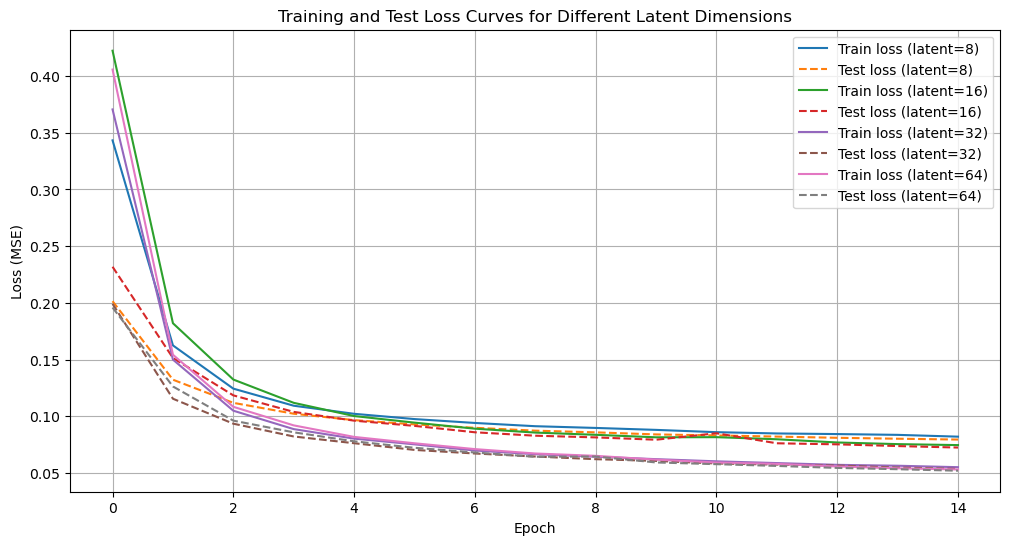

In [11]:
def plot_losses(results):
    plt.figure(figsize=(12, 6))
    for latent_dim, res in results.items():
        plt.plot(res['train_loss'], label=f'Train loss (latent={latent_dim})')
        plt.plot(res['test_loss'], linestyle='--', label=f'Test loss (latent={latent_dim})')

    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Test Loss Curves for Different Latent Dimensions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(results)

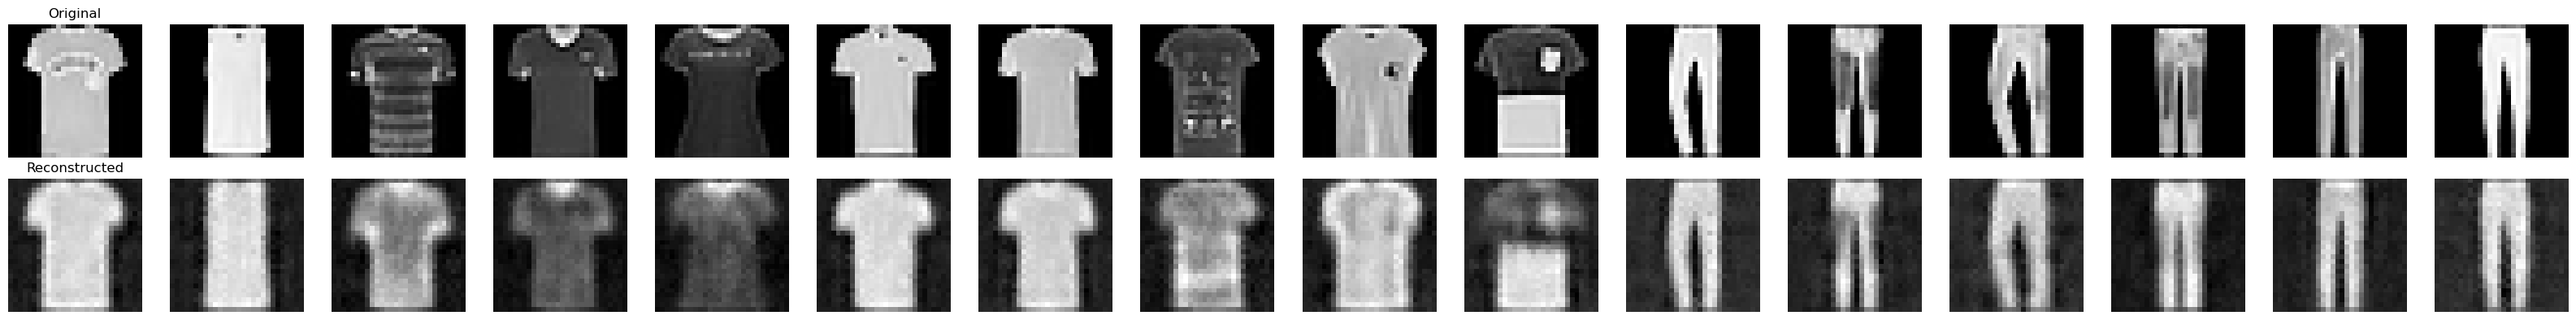

In [ ]:
def visualize_reconstructions(model, data_loader, device, num_images=16):
    model.eval()
    model.to(device)

    with tc.no_grad():
        X, _ = next(iter(data_loader))
        X = X.to(device)
        outputs = model(X)

    X = X.cpu()
    outputs = outputs.cpu()

    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))

    for i in range(num_images):
        # Original images
        axes[0, i].imshow(X[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Reconstructed imagesz
        recon_img = outputs[i].squeeze()
        recon_img = (recon_img - recon_img.min()) / (recon_img.max() - recon_img.min())
        axes[1, i].imshow(recon_img, cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Reconstructed')

    plt.tight_layout()
    plt.show()

best_model = results[64]['model']  # visualising the best model (the 64 dimensions one)
visualize_reconstructions(best_model, test_loader, device)

### Task 3

A linear autoencoder aims to represent the data $X\in \mathbb{R}^{n\times m}$ in a new basis using only $d<m$ directions.
The objective is to minimize the squared error between $X$ and $D(E(X))$ where $E: \mathbb{R}^{m}\to\mathbb{R}^{d}$ is the encoder and $D: \mathbb{R}^{d}\to\mathbb{R}^{m}$ is the decoder:
$$\|D(E(X)) - X\|^2_2$$

In geometric terms, we want to find $d$ axes along which most of the variance occurs which is exactly what Principal Component Analysis does. The optimal weights of a linear autoencoder with code dimension $d$ thus span the same space as the first $d$ principal components.

The PCA autoencoder just consists of 1 linear layer for the encoder and 1 linear layer for the decoder. The bias is necessary to subtract the mean value. Since we are dealing with three-dimensional images, we also have to flatten (when encoding) or unflatten (when decoding) the input.

In [14]:
import torch.nn as nn

class PCA_AE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super(PCA_AE, self).__init__()
        
        # Flatten the input shape to 1D vector size
        input_dim = input_shape[0] * input_shape[1] * input_shape[2]
        
        # Encoder: linear layer with bias to learn projection + mean subtraction
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, latent_dim, bias=True)
        )
        
        # Decoder: linear layer with bias to reconstruct + add mean back
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, input_dim, bias=True),
            nn.Unflatten(1, input_shape)
        )
        
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


For the training we can use the same function as for the convolutional autoencoder.

In [21]:
input_shape = (1, 28, 28)  # For FashionMNIST grayscale images
latent_dim = 32

# Initialize the PCA autoencoder
pca_ae_model = PCA_AE(input_shape=input_shape, latent_dim=latent_dim)

# Train the model
train_loss, test_loss = train_ae(
    model=pca_ae_model,
    train_loader=train_loader,
    test_loader=test_loader,
    lr=1e-3,
    n_epochs=50,
    device='cuda' if tc.cuda.is_available() else 'cpu'
)

Epoch 1/50 - Train Loss: 0.4997, Test Loss: 0.2997
Epoch 2/50 - Train Loss: 0.2411, Test Loss: 0.1892
Epoch 3/50 - Train Loss: 0.1782, Test Loss: 0.1564
Epoch 4/50 - Train Loss: 0.1533, Test Loss: 0.1380
Epoch 5/50 - Train Loss: 0.1350, Test Loss: 0.1239
Epoch 6/50 - Train Loss: 0.1215, Test Loss: 0.1141
Epoch 7/50 - Train Loss: 0.1132, Test Loss: 0.1077
Epoch 8/50 - Train Loss: 0.1072, Test Loss: 0.1024
Epoch 9/50 - Train Loss: 0.1024, Test Loss: 0.0977
Epoch 10/50 - Train Loss: 0.0983, Test Loss: 0.0939
Epoch 11/50 - Train Loss: 0.0947, Test Loss: 0.0907
Epoch 12/50 - Train Loss: 0.0923, Test Loss: 0.0878
Epoch 13/50 - Train Loss: 0.0893, Test Loss: 0.0855
Epoch 14/50 - Train Loss: 0.0870, Test Loss: 0.0835
Epoch 15/50 - Train Loss: 0.0855, Test Loss: 0.0817
Epoch 16/50 - Train Loss: 0.0837, Test Loss: 0.0801
Epoch 17/50 - Train Loss: 0.0819, Test Loss: 0.0786
Epoch 18/50 - Train Loss: 0.0806, Test Loss: 0.0773
Epoch 19/50 - Train Loss: 0.0791, Test Loss: 0.0760
Epoch 20/50 - Train L

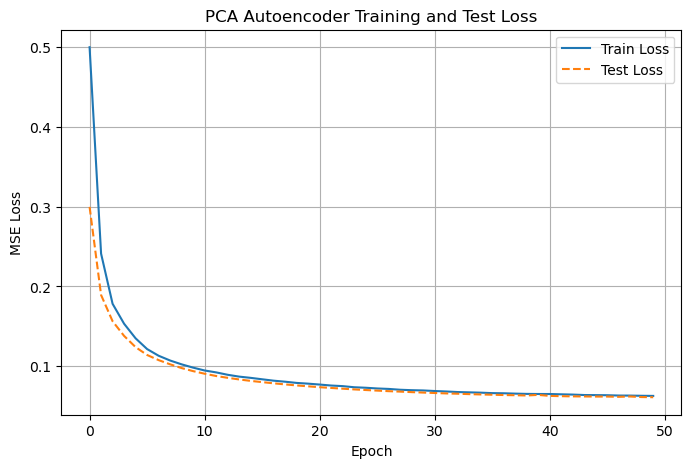

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('PCA Autoencoder Training and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

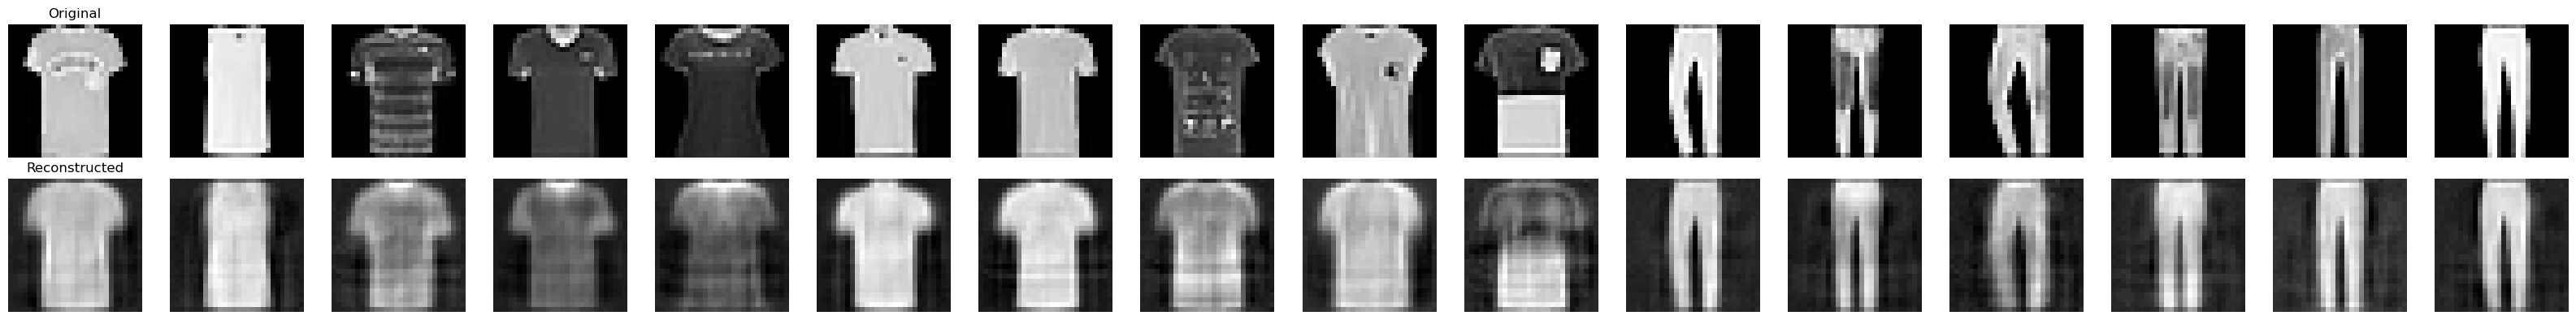

In [24]:
def visualize_reconstructions_pca(model, data_loader, device, num_images=16):
    model.eval()
    model.to(device)

    with tc.no_grad():
        X, _ = next(iter(data_loader))
        X = X.to(device)
        outputs = model(X)

    X = X.cpu()
    outputs = outputs.cpu()

    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))

    for i in range(num_images):
        # Original images
        axes[0, i].imshow(X[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Reconstructed images
        recon_img = outputs[i].squeeze()
        # Normalize to [0,1] for visualization
        recon_img = (recon_img - recon_img.min()) / (recon_img.max() - recon_img.min())
        axes[1, i].imshow(recon_img, cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Reconstructed')

    plt.tight_layout()
    plt.show()


device = 'cuda' if tc.cuda.is_available() else 'cpu'
visualize_reconstructions_pca(pca_ae_model, test_loader, device)